In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-plastic-waste-2023-a-country-wise-analysis/Plastic Waste Around the World.csv


# Understanding the Data 🔍🚀

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/global-plastic-waste-2023-a-country-wise-analysis/Plastic Waste Around the World.csv')
df

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low
...,...,...,...,...,...,...
160,Marshall Islands,0.01,Consumer_Packaging,1.8,168.5,High
161,Micronesia,0.01,Consumer_Packaging,1.5,86.3,High
162,Palau,0.01,Consumer_Packaging,12.3,437.2,High
163,Tuvalu,0.01,Consumer_Packaging,1.2,833.3,High


In [4]:
df.shape

(165, 6)

In [5]:
df.columns

Index(['Country', 'Total_Plastic_Waste_MT', 'Main_Sources', 'Recycling_Rate',
       'Per_Capita_Waste_KG', 'Coastal_Waste_Risk'],
      dtype='object')

In [6]:
df.head(10)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low
5,Brazil,5.96,Consumer_Packaging,1.2,28.1,Medium
6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High
7,Russia,5.84,Industrial_Consumer,5.6,40.2,Medium
8,United Kingdom,5.03,Packaging_Consumer,46.2,74.3,Low
9,France,4.98,Packaging_Consumer,27.3,73.1,Low


In [7]:
df.describe()

,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG
count,165.000000,165.000000,165.000000
mean,1.723515,13.096364,122.255152
std,6.001944,16.687354,222.849695
min,0.010000,0.100000,2.600000
25%,0.120000,1.200000,17.300000
50%,0.510000,5.400000,54.900000
75%,1.330000,16.400000,127.500000
max,59.080000,84.800000,1564.400000


In [8]:
df.describe(include='all')

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
count,165,165.000000,165,165.000000,165.000000,165
unique,165,NaN,10,NaN,NaN,4
top,China,NaN,Consumer_Packaging,NaN,NaN,High
freq,1,NaN,131,NaN,NaN,74
mean,NaN,1.723515,NaN,13.096364,122.255152,NaN
std,NaN,6.001944,NaN,16.687354,222.849695,NaN
min,NaN,0.010000,NaN,0.100000,2.600000,NaN
25%,NaN,0.120000,NaN,1.200000,17.300000,NaN
50%,NaN,0.510000,NaN,5.400000,54.900000,NaN
75%,NaN,1.330000,NaN,16.400000,127.500000,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB


In [10]:
df.isna().sum()

Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

In [11]:
df.isnull().sum()

Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

No Missing Values⚡️✨ Let's Proceed!

In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique()

Country                   165
Total_Plastic_Waste_MT    122
Main_Sources               10
Recycling_Rate             83
Per_Capita_Waste_KG       146
Coastal_Waste_Risk          4
dtype: int64

# Univariate Analysis 📊📈⚡️

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [15]:
coastal_risk_counts = df['Coastal_Waste_Risk'].value_counts()
coastal_risk_counts

Coastal_Waste_Risk
High         74
Low          54
Medium       33
Very_High     4
Name: count, dtype: int64

In [16]:
high_risk = df[df['Coastal_Waste_Risk']=='High']['Coastal_Waste_Risk'].count()
low_risk = df[df['Coastal_Waste_Risk']=='Low']['Coastal_Waste_Risk'].count()
medium_risk = df[df['Coastal_Waste_Risk']=='Medium']['Coastal_Waste_Risk'].count()
very_high_risk = df[df['Coastal_Waste_Risk']=='Very_High']['Coastal_Waste_Risk'].count()

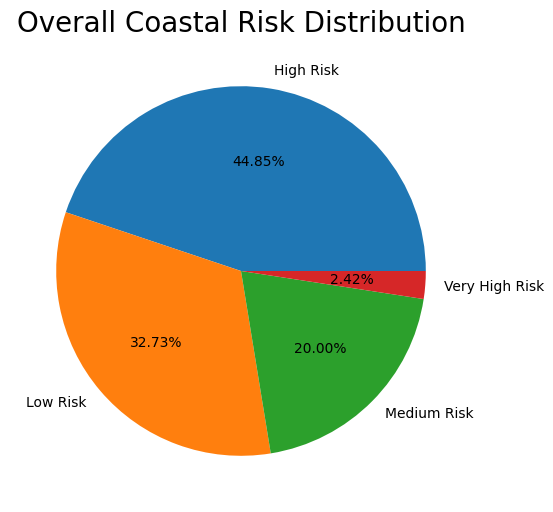

In [17]:
plt.figure(figsize=(10,6))

index_values = [high_risk, low_risk, medium_risk, very_high_risk]
index_labels = ['High Risk', 'Low Risk', 'Medium Risk', 'Very High Risk']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Coastal Risk Distribution', fontsize=20)

plt.show()

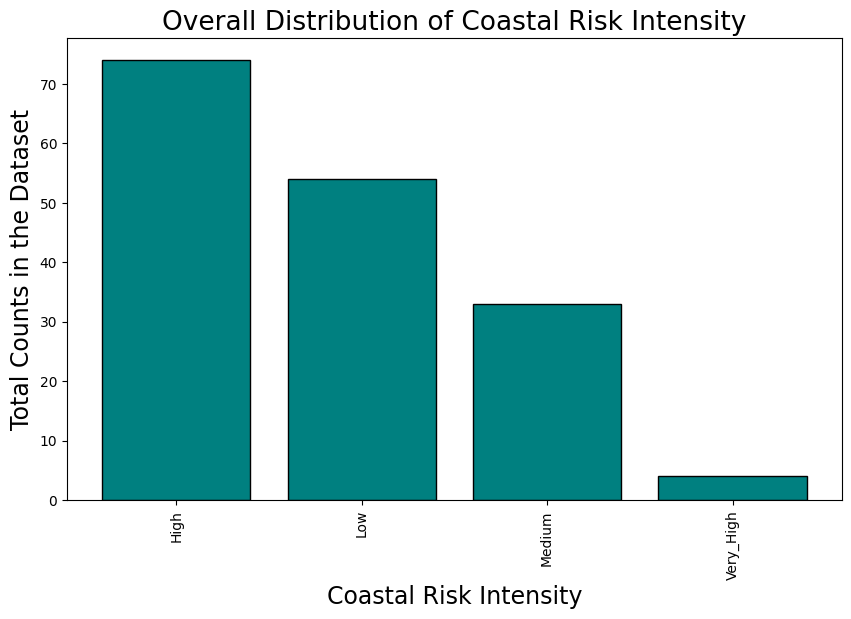

In [18]:
plt.figure(figsize=(10,6))

plt.bar(coastal_risk_counts.index, coastal_risk_counts.values, color='teal', edgecolor='black')

plt.xticks(coastal_risk_counts.index, coastal_risk_counts.index, rotation = 90)

plt.xlabel('Coastal Risk Intensity', fontsize=17)
plt.ylabel('Total Counts in the Dataset', fontsize=17)

plt.title('Overall Distribution of Coastal Risk Intensity', fontsize=19)

plt.show()

In [19]:
main_sources_counts = df['Main_Sources'].value_counts()
main_sources_counts

Main_Sources
Consumer_Packaging       131
Industrial_Packaging      14
Packaging_Consumer         5
Packaging_Industrial       4
Industrial_Consumer        4
Food_Packaging             3
Consumer_Goods             1
Packaging_Electronics      1
Automotive_Packaging       1
Electronics_Packaging      1
Name: count, dtype: int64

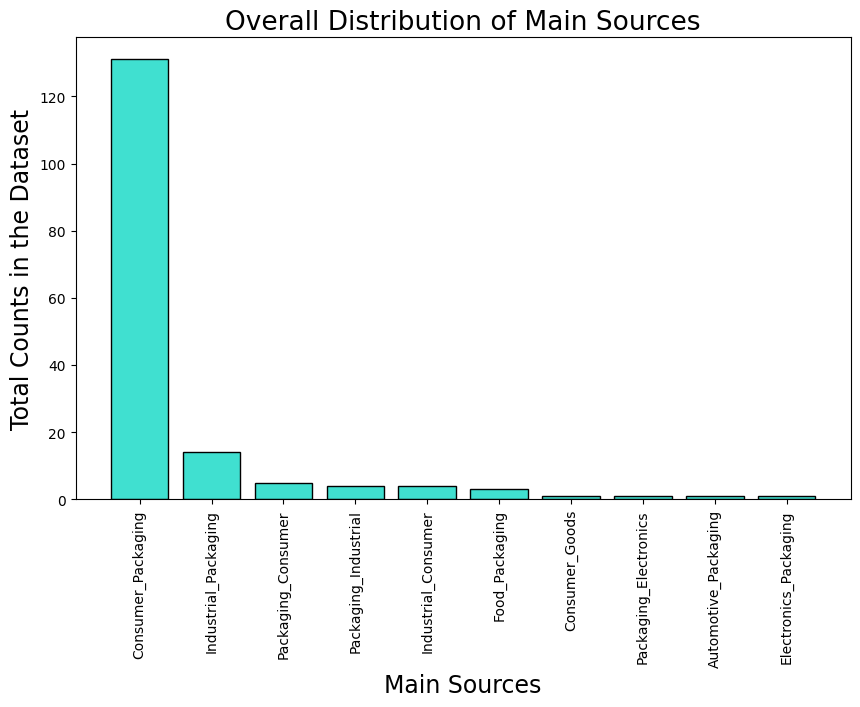

In [20]:
plt.figure(figsize=(10,6))

plt.bar(main_sources_counts.index, main_sources_counts.values, color='turquoise', edgecolor='black')

plt.xticks(main_sources_counts.index, main_sources_counts.index, rotation = 90)

plt.xlabel('Main Sources', fontsize=17)
plt.ylabel('Total Counts in the Dataset', fontsize=17)

plt.title('Overall Distribution of Main Sources', fontsize=19)

plt.show()

Consumer Packaging is the biggest source of Global Plastic Waste. We must focus on this especially to minimize plastic waste.

# World Map EDA 🗺️🆕💯

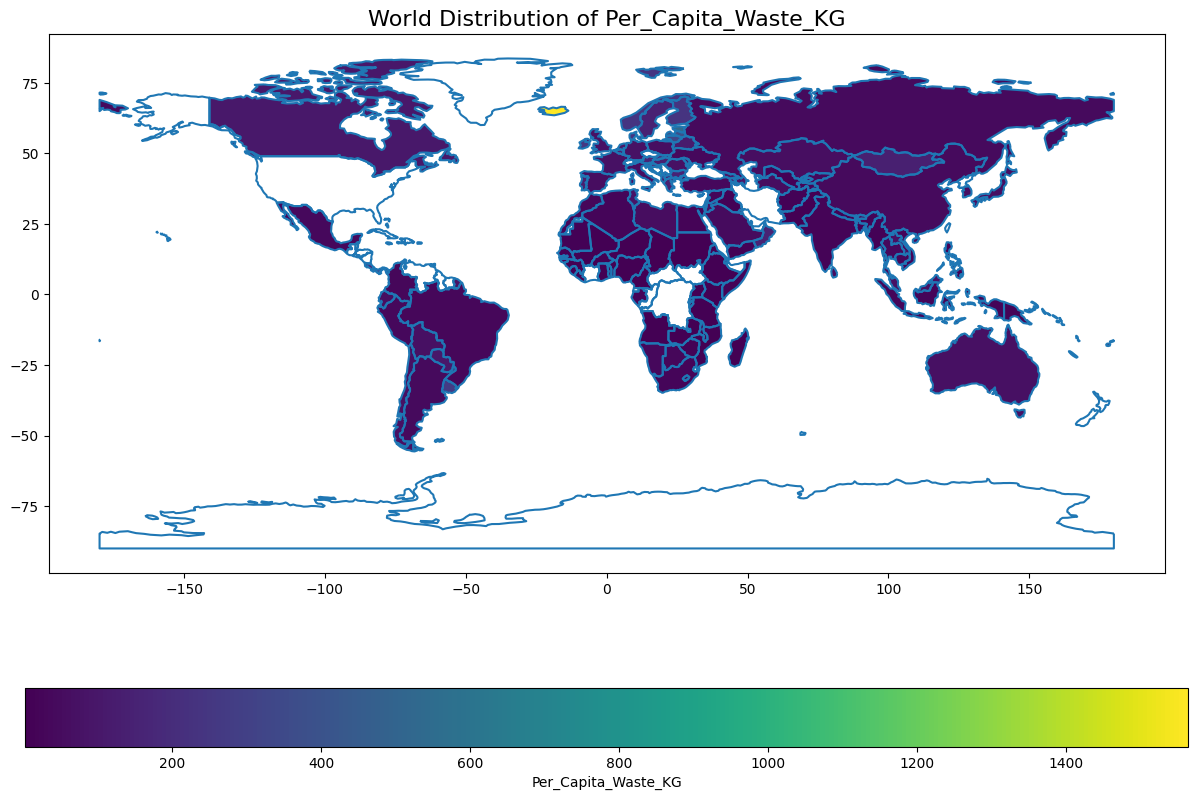

In [21]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Per_Capita_Waste_KG', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': "Per_Capita_Waste_KG",
                        'orientation': "horizontal"})

plt.title('World Distribution of Per_Capita_Waste_KG', fontsize=16)
plt.show()

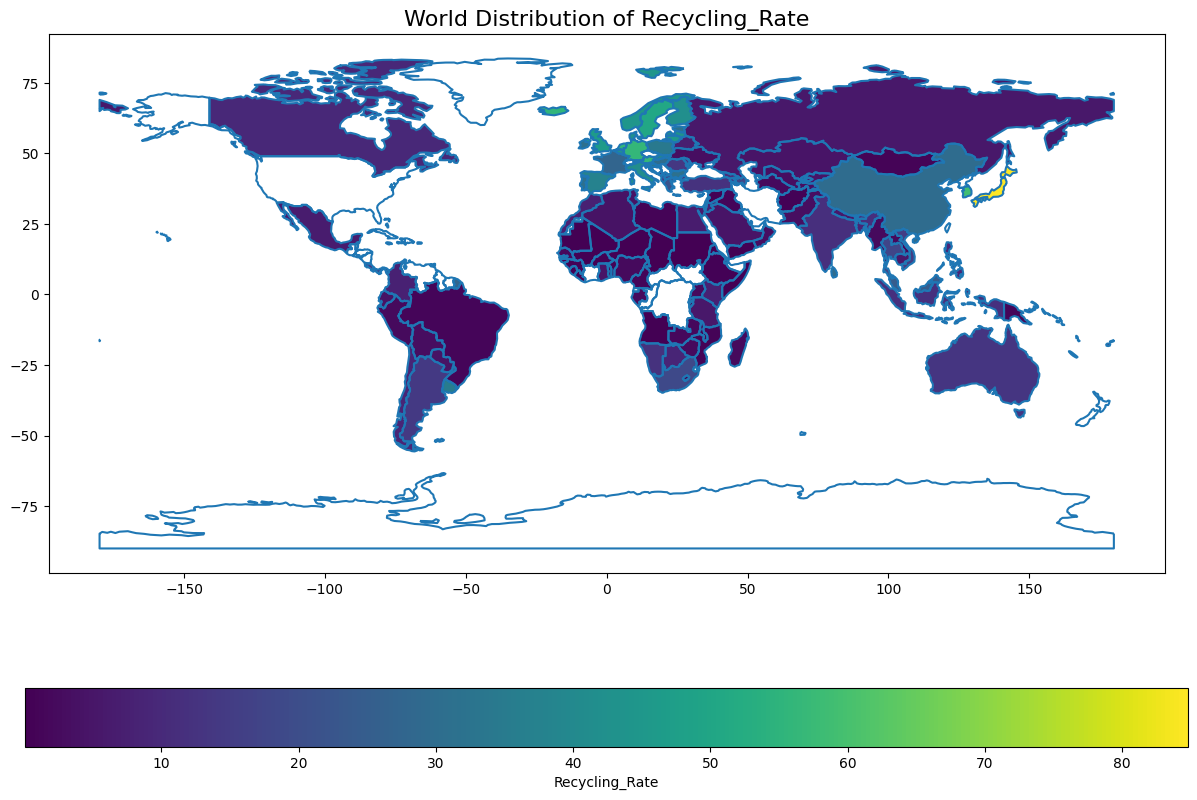

In [22]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Recycling_Rate', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': "Recycling_Rate",
                        'orientation': "horizontal"})

plt.title('World Distribution of Recycling_Rate', fontsize=16)
plt.show()

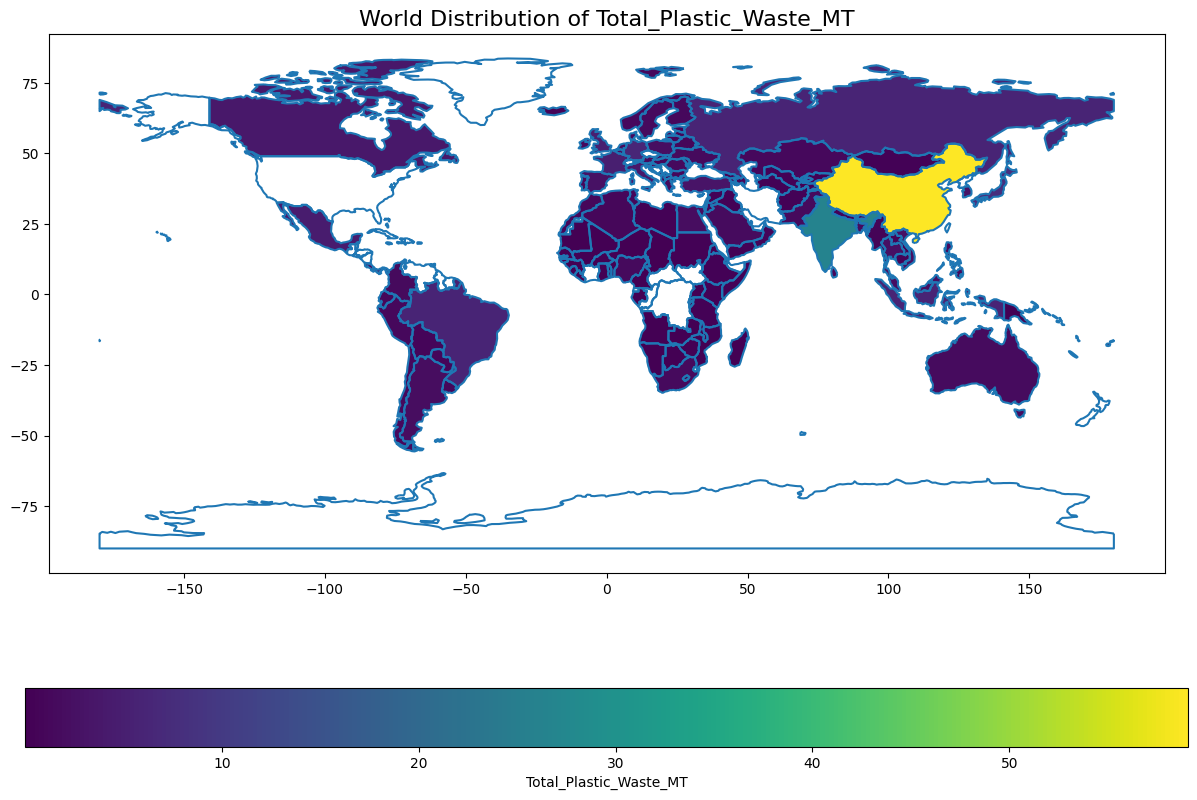

In [23]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Total_Plastic_Waste_MT', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': "Total_Plastic_Waste_MT",
                        'orientation': "horizontal"})

plt.title('World Distribution of Total_Plastic_Waste_MT', fontsize=16)
plt.show()

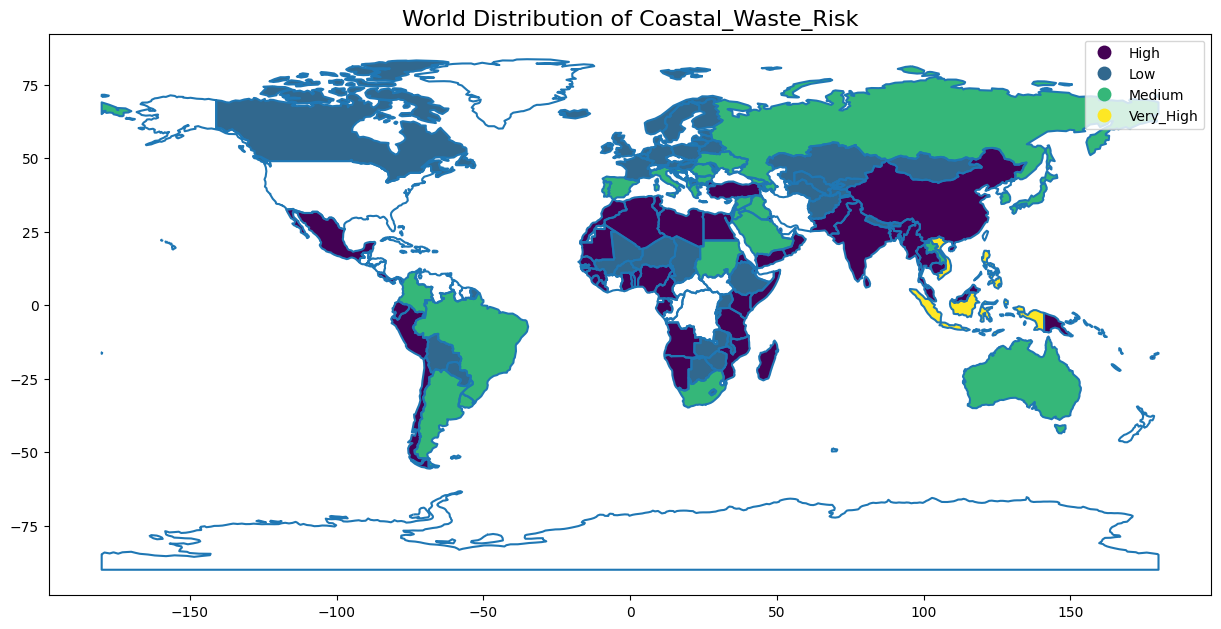

In [24]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Coastal_Waste_Risk', ax=ax, legend=True, cmap='viridis')

plt.title('World Distribution of Coastal_Waste_Risk', fontsize=16)
plt.show()

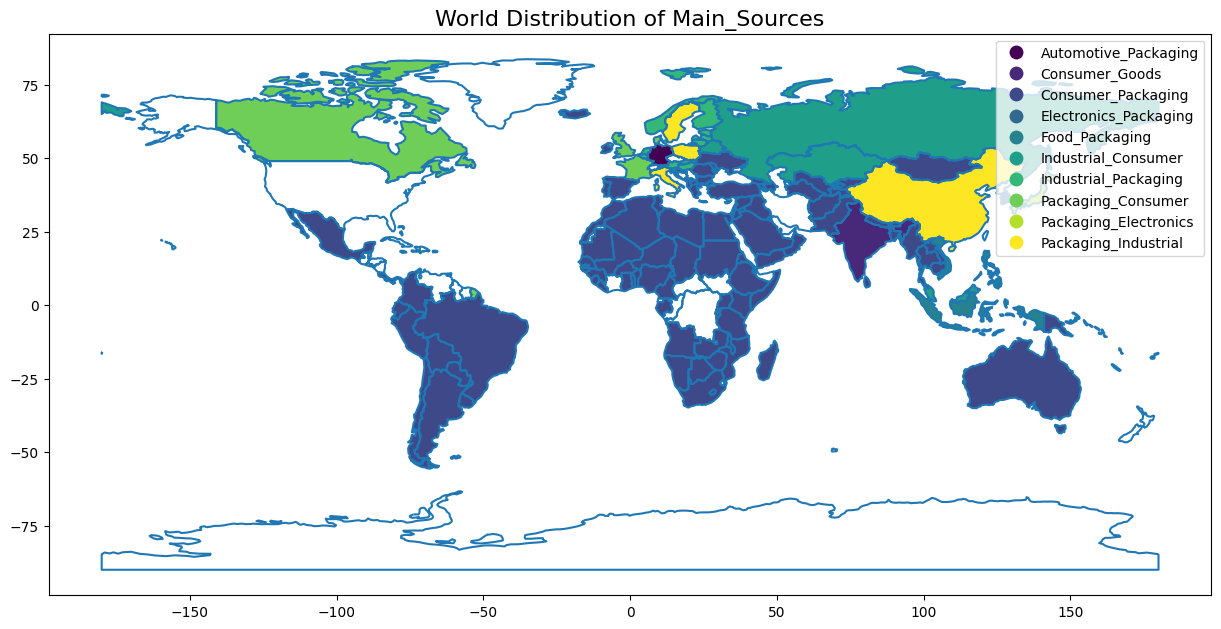

In [25]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Main_Sources', ax=ax, legend=True, cmap='viridis')

plt.title('World Distribution of Main_Sources', fontsize=16)
plt.show()

# Classification Model 1: RandomForest Classifier🔝

In [26]:
from sklearn.preprocessing import LabelEncoder
df['Coastal_Waste_Risk'] = LabelEncoder().fit_transform(df['Coastal_Waste_Risk'])
df['Coastal_Waste_Risk']

0      0
1      2
2      0
3      2
4      1
      ..
160    0
161    0
162    0
163    0
164    0
Name: Coastal_Waste_Risk, Length: 165, dtype: int64

In [27]:
df['Main_Sources'] = LabelEncoder().fit_transform(df['Main_Sources'])
df['Main_Sources']

0      9
1      7
2      1
3      8
4      0
      ..
160    2
161    2
162    2
163    2
164    2
Name: Main_Sources, Length: 165, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [29]:
features = df.drop(columns=['Country', 'Main_Sources'])
target = df['Main_Sources']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=29)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=29)

In [34]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf

array([2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
y_test

100    2
137    2
31     6
93     2
124    2
39     6
160    2
2      1
155    2
63     2
147    2
126    2
136    2
127    2
120    2
87     2
45     2
53     5
161    2
89     2
157    2
28     2
27     2
73     2
110    2
90     2
149    2
48     5
10     2
7      5
128    2
125    2
98     2
Name: Main_Sources, dtype: int64

In [36]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8181818181818182

# Classification Model 2: CatBoost Classifier🔝

In [37]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
features = df.drop(columns=['Country', 'Coastal_Waste_Risk'])
target = df['Coastal_Waste_Risk']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.05, random_state=29)

In [40]:
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=False, random_state=29)
catboost_model.fit(X_train, y_train)

In [41]:
y_pred_cb = catboost_model.predict(X_test)
y_pred_cb

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0]])

In [42]:
y_test

100    1
137    2
31     1
93     0
124    1
39     1
160    0
2      0
155    0
Name: Coastal_Waste_Risk, dtype: int64

In [43]:
accuracy = accuracy_score(y_test, y_pred_cb)
print(accuracy)

0.7777777777777778


# Multivariate Analysis📊📈✨

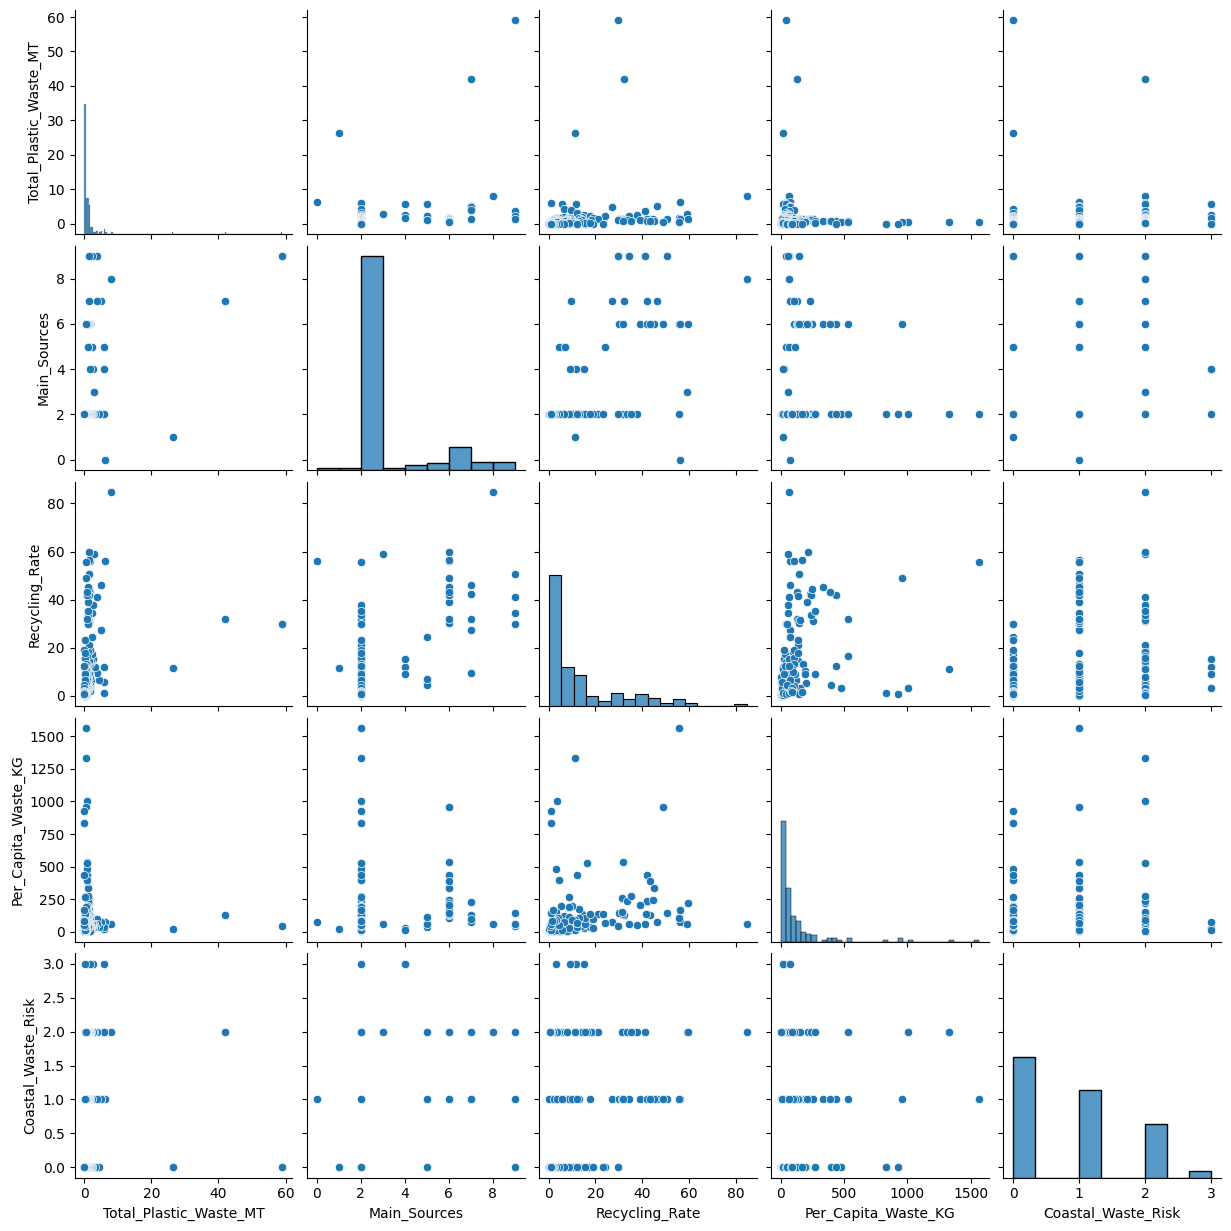

In [44]:
sns.pairplot(df)

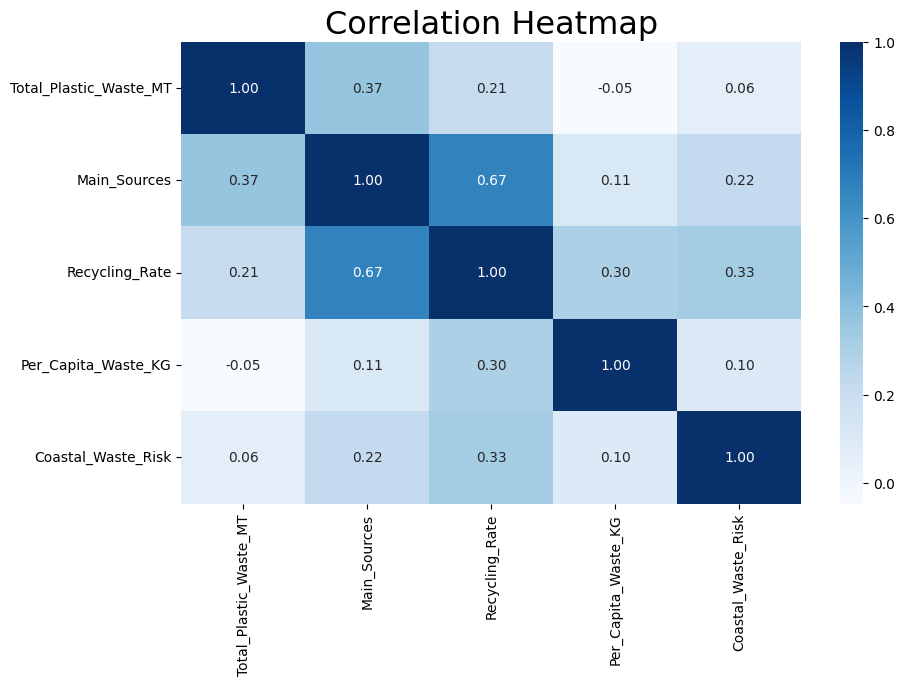

In [45]:
plt.figure(figsize=(10,6))
corr_matrix = df.drop(columns=['Country']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=23)
plt.show()

* Strong Positive Correlations between Main_Sources and Recycling_Rate are observed.
* Positive Correlations are also witnessed between Main_Sources and Total_Plastic_Waste_MT
* Positive Correlations are also witnessed between Per_Capita_Waste_KG and Recycling_Rate
* Positive Correlations are also witnessed between Main_Sources and Coastal_Waste_Risk

# Thank You ❤️✨

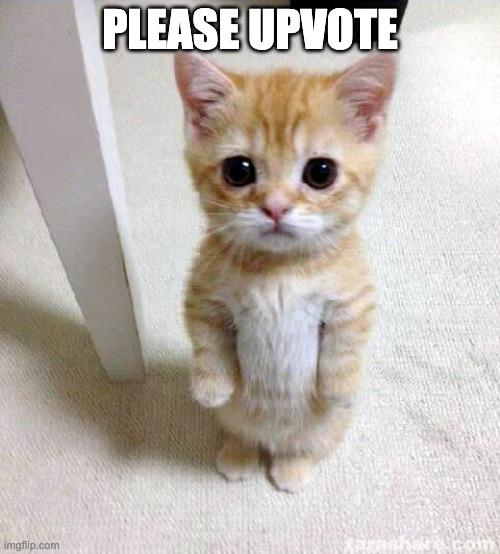